# Lab: Fossil Fuel Consumption

## 1. Introduction
In this lab, you will be investigating monthly fossil fuel consumption in the United States from January 2001 to July 2020. This type of data is called a time series. Time series data consists of a series of observations recorded in time, where the order of the observations is crucial because they're dependent. 

In our case, we want to investigate monthly fossil fuel consumption because we want to know if the COVID-19 lockdown affected people's decisions to consume/use fossil fuels and how much effect it had over the months. For example, since the lockdown, people may feel scared to drive outside and thus, use less fuel. Also, factories or businesses might not have operated at full efficiency, which might have affected fossil fuel consumption.

In our dataset, fossil fuel consumption includes coal, natural gas, and petroleum/petroleum products. The units are in quadrillion Btu, or British thermal unit. A British thermal unit is the amount of heat required to raise one pound of water by 1 degree Fahrenheit. 

**Question 1.1.** Read in "fossil_fuel_consumption.csv" using datascience.tables.Table.read_table and store the table in a variable. 

The data is pulled directly from the U.S. Energy Information Administration (EIA) here: https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T01.01#/?f=M&start=200001&end=202007&charted=11. 
Additional information about how these data were collected is available here: https://www.eia.gov/totalenergy/data/monthly/pdf/sec1.pdf.

First, inspect the table and its rows and columns. There should be 7704 rows and 6 columns. Below is a brief summary of the data contained in each column:

**MSN**: Mnemonic Series Names, the name for the category of data. In this lab, we are interested in the rows with "FFTCBUS" which stands for "Total Fossil Fuel Consumption". There are other categories in this big dataset, such as total fossil fuel production, nuclear electric power production, but we can ignore those categories for the purpose of this lab.

**YYYYMM**: The year and month when the value was recorded. YYYY is the 4-digit year while MM is the 2-digit month.

**Value**: The recorded value for the category we're interested in, for that specific year and month.

**Column Order**: An integer to represent which category the value belongs to, out of the 12 total categories.

**Description**: A description of the category. 

**Unit**: The unit for the values.

In [1]:
## your code here

from datascience import *
table = Table.read_table("fossil_fuel_consumption.csv")

**Question 1.2.** As an example, print out the row at index 5136. This is the row where the Total Fossil Fuels Consumptions category starts. Remember that "FFTCBUS" stands for "Total Fossil Fuel Consumption."

You should see that measurements start on "194913" with total fossil fuel consumption at 28.9884 quadrillion Btu. What does this mean? There is no 13th month. Right, this is because "13" here stands for the entire year. The EIA did not record monthly total fossil fuel consumption for 1949, they only recorded the annual consumption for that year. So this row tells us that in 1949, the annual total fossil fuel consumption is 28.9884 quadrillion Btu.

Since we are investigating monthly consumption, we are not interested in dates that end in "13" in the "YYYYMM" column because those stand for annual values. We will need to wrangle the dataset a bit to get the exact dates/values we're interested in. You will see that in this dataset, for the years that do include monthly data, an annual value will appear after December, denoted by a date ending in "13".

In [2]:
## your code here

table.row(5136)

Row(MSN='FFTCBUS', YYYYMM=194913, Value=28.988371, Column_Order=9, Description='Total Fossil Fuels Consumption', Unit='Quadrillion Btu')

## 2. Data Manipulation

**Question 2.1.** For our purposes, we will only be looking at data from January 2001 to July 2020 and from the total fossil fuel consumption category, marked as, "FFTCBUS". Filter out all the rows that fulfills these two conditions and save it in another table. Inspect your new table to check that you have the correct rows. You should have 254 rows and 6 columns.

In [3]:
## your code here

table2 = table.where("MSN","FFTCBUS")
table3 = table2.where("YYYYMM", are.above(200013))

table3

MSN,YYYYMM,Value,Column_Order,Description,Unit
FFTCBUS,200101,8.05806,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200102,7.02655,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200103,7.36224,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200104,6.62059,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200105,6.54201,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200106,6.48268,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200107,6.97562,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200108,7.13466,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200109,6.34076,9,Total Fossil Fuels Consumption,Quadrillion Btu
FFTCBUS,200110,6.67042,9,Total Fossil Fuels Consumption,Quadrillion Btu


**Question 2.2.** Print out the dates in the "YYYYMM" column. Notice that you have rows with the date "200113" and "200213". Remember that these two rows contain the annual consumption and is thus, not needed in our table. Can you figure out a way to drop every 13th row (all the rows that contain dates ending in "13") from your table? Hint: numpy.arange might be helpful, the documentation is here: https://numpy.org/doc/stable/reference/generated/numpy.arange.html.

Print out the dates in the "YYYYMM" column again just to check that all the dates ending in "13" is gone from your table.

In [5]:
## your code here

print(table3.column("YYYYMM"))

import numpy as np
table4 = table3.exclude(np.arange(12, 254, step=13))

print(table4.column("YYYYMM"))

[200101 200102 200103 200104 200105 200106 200107 200108 200109 200110
 200111 200112 200113 200201 200202 200203 200204 200205 200206 200207
 200208 200209 200210 200211 200212 200213 200301 200302 200303 200304
 200305 200306 200307 200308 200309 200310 200311 200312 200313 200401
 200402 200403 200404 200405 200406 200407 200408 200409 200410 200411
 200412 200413 200501 200502 200503 200504 200505 200506 200507 200508
 200509 200510 200511 200512 200513 200601 200602 200603 200604 200605
 200606 200607 200608 200609 200610 200611 200612 200613 200701 200702
 200703 200704 200705 200706 200707 200708 200709 200710 200711 200712
 200713 200801 200802 200803 200804 200805 200806 200807 200808 200809
 200810 200811 200812 200813 200901 200902 200903 200904 200905 200906
 200907 200908 200909 200910 200911 200912 200913 201001 201002 201003
 201004 201005 201006 201007 201008 201009 201010 201011 201012 201013
 201101 201102 201103 201104 201105 201106 201107 201108 201109 201110
 20111

## 3. Plotting the data

**Question 3.1.** Let's visualize our data and plot a line chart using datascience.tables.Table.plot with "YYYYMM" on the x-axis and "Value" on the y-axis.

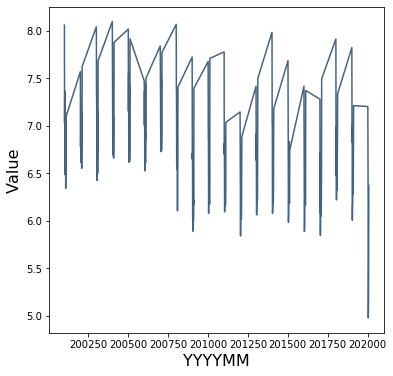

In [6]:
import matplotlib
%matplotlib inline

## your code here

table4.plot('YYYYMM', 'Value')

**Question 3.2.** What do you notice about your graph? Does it seem strange to you?

(write your answer here)

## 4. Creating a time series dataframe

**Question 4.1.** Your graph looks strange due to the "YYYYMM" column. For example, in this column we have "200101", "200102", etc. We know that they stand for dates, but Python actually sees them as regular numbers in our table. In order to properly visualize our data, we need to convert our table into an actual time series. Even though it is beyond the scope of this course, pandas dataframes provide an easy way to handle time series data. First, convert your table into a dataframe called "my_df" using datascience.tables.Table.to_df. 

In [8]:
## your code here

my_df = table4.to_df()

To make a time series dataframe, we need to convert the dates in "YYYYMM" into timestamps using pandas. You can do so by running the code below. Here, we are formatting the first 4 digits of "YYYYMM" as the year and the last 2 digits as the month.

In [9]:
import pandas as pd
## my_df["YYYYMM"] = pd.to_datetime(my_df["YYYYMM"], format='%Y%m')

**Question 4.2.** Print out a snippet of your dataframe. Examine the "YYYYMM" column. Now the date should be formatted like YYYY-MM-DD. Please ignore the days. The days are not supposed to show up but they do anyways because it is a known bug in to_datetime().

In [13]:
## your code here

**Question 4.3.** Since we are working with a time series, it is helpful to set the index as the date instead of ordered numbers. This will help us solve our issue from before, where our plot looked strange. We will use the pandas dataframe's set_index() method to set the index to "YYYYMM". Now that our dataframe's index is a DatetimeIndex, we can extract the months and years into new columns. We make a "Month" and "Year" column in our dataframe.

In [10]:
## my_df = my_df.set_index("YYYYMM") #set the index as the date
## my_df["Year"] = my_df.index.year #making a Year column
## my_df["Month"] = my_df.index.month #making a Month column

## 5. Plotting the time series

**Question 5.1.** Now we are ready to plot our time series with extra help from Seaborn, a data visualization library, so that our plots look nice. We plot the "Value" column of our dataframe using the dataframe's plot() method.

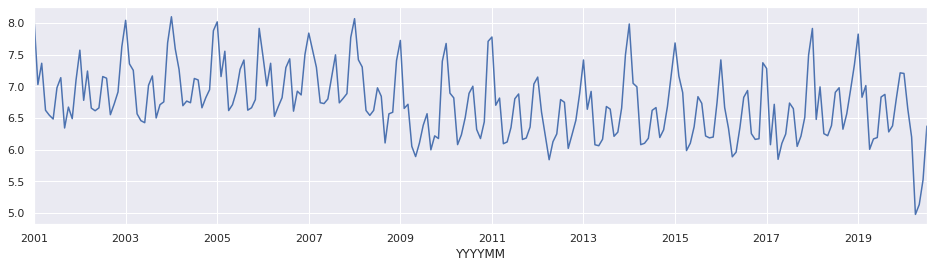

In [11]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(16, 4)}) #setting the appropriate size of our plot

## my_df["Value"].plot()

Let's examine our plot closely. We all know that COVID-19 affected the US starting around early April 2020. Can you see the huge dip in the plot during this month? You should notice that there is an apparent huge DECREASE in fossil fuel consumption for April 2020. This makes sense because this is the time when people were extremely cautious of catching COVID-19 and many restrictions/lockdowns/quarantines were in place. For example, people were wary and did not drive outside as much, thus lowering the total fuel consumption. Could you think of more reasons why fossil fuel consumption decreased a lot in April 2020?

However, do you also notice the natural dips and peaks in our plot that occur every year? For example, you can see that people tend to use more fuel during certain months like December and January. Can you think of a few reasons why? These dips/peaks each year are a natural part of the data because people just tend to use more or less fuel during these certain months. This is called seasonality in time series analysis.

What we want to know is: is the big dip at April 2020 significantly different from the seasonal variation in the data? How significant is it? At first glance, we can tell that that huge dip is obviously not a part of the typical seasonal variation. But how can we investigate this further?

(write your answers here)

**Question 5.2.** One way is to plot boxplots grouped by months! We plot 12 boxplots, one for each month, using sns.boxplot(). Since we already made a "Month" column, this is easy to do.

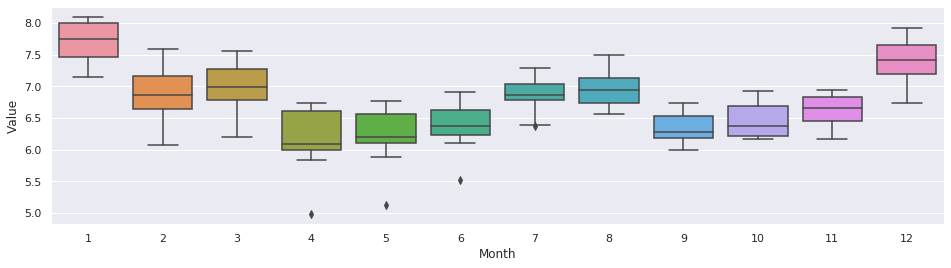

In [12]:
## sns.boxplot(data=my_df, x="Month", y="Value")

**Question 5.3.** Look back on your dataframe. What are the total fossil fuel consumption values for April, May, June, and July 2020? Can you spot them on your boxplots? You should be able to see that these 4 data points show up as outliers on our boxplots, marked by a diamond marker. Can you say something about fuel consumption in April 2020 compared to previous years' consumptions in April? Do the same for May, June, and July. Think about the seasonal variation and how this relates to the outliers you see.

What does this plot say about people's willingness to self-isolate and respect COVID-19 lockdowns/quarantines as time passes from April to July 2020? It may help to keep in mind the various reasons we use fossil fuels, and also remember that correlation does not equal causation. 

(write your answers here)

**Question 5.4.** For fun, we can also plot boxplots for each year. What interesting observations do you see from these boxplots?

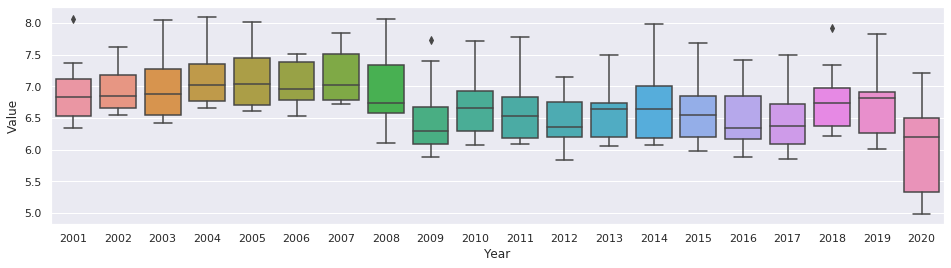

In [13]:
## sns.boxplot(data=my_df, x="Year", y="Value")

(write your answers here)